In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import asarray

In [20]:
def jointhist(I,J,bins):
    

    image1 = mpimg.imread(I)
    image2 = mpimg.imread(J)
    
    image_data1 = asarray(image1)
    image_data2 = asarray(image2)
    
    if image_data1.shape != image_data2.shape:
        print ("Images are not of equal size")
        print(f"1st image has size {image_data1.shape} whereas 2nd image has size {image_data2.shape}")
        
    else:
        hist2d = np.histogram2d(image_data1.ravel(),image_data2.ravel(), bins = bins)
        
        plt.figure()
        
        fig, ax = plt.subplots(1, 3, figsize = (10,10))
        ax[0].imshow(mpimg.imread(I))
        ax[0].set_title(f'Image {I}')
        ax[1].imshow(mpimg.imread(I))
        ax[1].set_title(f'Image {J}')
        ax[2].imshow(hist2d[0])
        ax[2].set_title(f'2D histogram with {bins} bins')
        
            
    return hist2d
    

<Figure size 432x288 with 0 Axes>

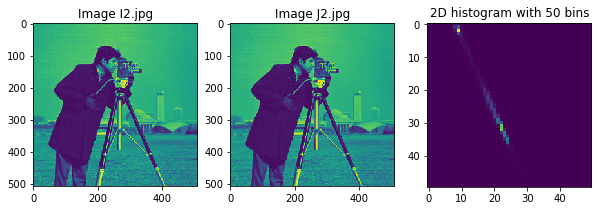

In [15]:
# (b)
# Computing the sum of joint histogram 
# consider a sample image and its joint histogram generated from above function

jhist = jointhist('I2.jpg','J2.jpg',bins= 50)

In [46]:
# Sum of Joint histogram coordinates
sum_hist = sum(sum(jhist[0]))

# The multiplication of input array shape
image_data1 = mpimg.imread('I2.jpg')
mult_array = image_data1.shape[0]*image_data1.shape[1]

# The question is to confirm that the above two variables generated are equal
print("The sum of 2d histogram coordinates values and the multiplication of shape of input image\nare equal ! True or False :  ", sum_hist == mult_array)


The sum of 2d histogram coordinates values and the multiplication of shape of input image
are equal ! True or False :   True


<Figure size 432x288 with 0 Axes>

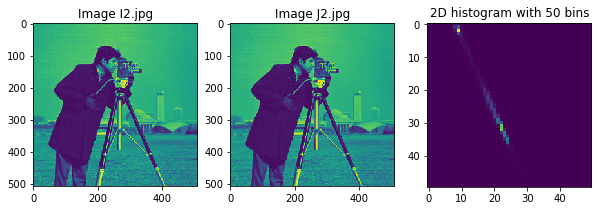

In [66]:
# (c)
jhist = jointhist('I2.jpg','J2.jpg',bins= 50)

<Figure size 432x288 with 0 Axes>

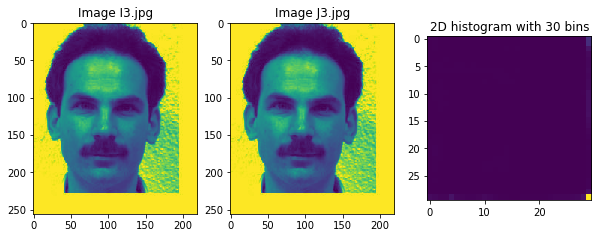

In [69]:
jhist = jointhist('I3.jpg','J3.jpg',bins= 30)

<Figure size 432x288 with 0 Axes>

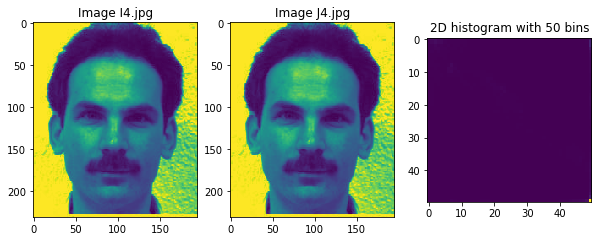

In [71]:
jhist = jointhist('I4.jpg','J4.jpg',bins= 50)

<Figure size 432x288 with 0 Axes>

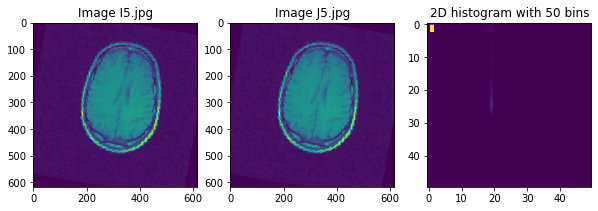

In [72]:
jhist = jointhist('I5.jpg','J5.jpg',bins= 50)

<Figure size 432x288 with 0 Axes>

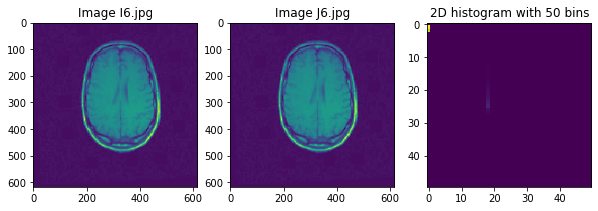

In [73]:
jhist = jointhist('I6.jpg','J6.jpg',bins= 50)

In [21]:
# Part 2 : 
# (a) The function to find SSD between two equal sized image

def SSD(I,J):
    image_data1 = mpimg.imread(I)
    image_data2 = mpimg.imread(J)
    
    if image_data1.shape != image_data2.shape:
        print ("Images are of unequal size")
    else:
        difference = image_data1 - image_data2
        if difference.ndim == 3:
            SSD = sum(sum(sum(difference**2)))
        else:
            SSD = sum(sum(difference**2))
    
    return SSD
    

In [34]:
# (b) Correlation among equal images

def Corr(I,J):
    
    image1 = mpimg.imread(I)
    image2 = mpimg.imread(J)
    
    x = asarray(image1)
    y = asarray(image2)
    
    if x.shape != y.shape:
        print ("Images are not of equal size")
        print(f"1st image has size {x.shape} whereas 2nd image has size {y.shape}")
        
    else:
        mean_x = x.mean()
        mean_y = y.mean()
        
        # Calculating difference of a point from mean
        x_diffmean = x- mean_x
        y_diffmean = y- mean_y
        
        coeff_num = np.sum(x_diffmean * y_diffmean)
        coeff_den = np.sqrt(np.sum(x_diffmean*x_diffmean) * np.sum(y_diffmean*y_diffmean))
        coeff = coeff_num / coeff_den
        
        # Putting the coeff value in range
        #p_coeff = max(min(coeff, 1.0), -1.0)
    
    return coeff
        
    


In [23]:
#(c) Mutual information among images

def MI(I,J):
    
    #The images passed will first go to jointhistogram function to get the joint histogram of two images
    hist2d = jointhist(I,J,50)
    
    # Converting the his2d zero element to probability values
    pxy = hist2d[0] / float(np.sum(hist2d[0]))
    
    #Generatng marginalsof x and y over each other
    px = np.sum(pxy, axis=1) 
    py = np.sum(pxy, axis=0) 
    
    px_py = px[:, None] * py[None, :] 
    
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    
    mi = np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))
    
    return mi

The ssd between these two images is 64827
The Correation between these two images is 0.9962134367832856
The mutual Information between these images is 1.8456753620571607


<Figure size 432x288 with 0 Axes>

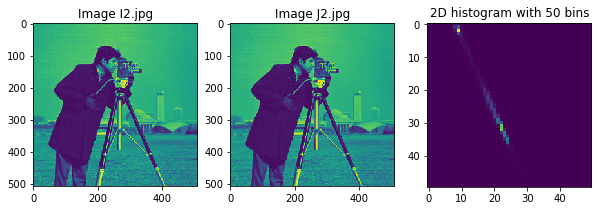

In [24]:
# (d)
#Comapring the results of above functions
ssd = SSD('I2.jpg','J2.jpg')
corr_coeff = Corr('I2.jpg','J2.jpg')
mi = MI('I2.jpg','J2.jpg')

print(f"The ssd between these two images is {ssd}")
print(f"The Correation between these two images is {corr_coeff}")
print(f"The mutual Information between these images is {mi}")

The ssd between these two images is 27999
The Correation between these two images is 0.14339070113716765
The mutual Information between these images is 0.21375819615944416


<Figure size 432x288 with 0 Axes>

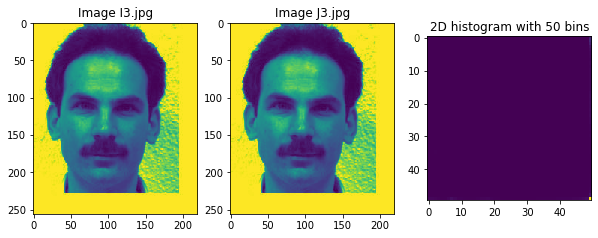

In [25]:
ssd = SSD('I3.jpg','J3.jpg')
corr_coeff = Corr('I3.jpg','J3.jpg')
mi = MI('I3.jpg','J3.jpg')

print(f"The ssd between these two images is {ssd}")
print(f"The Correation between these two images is {corr_coeff}")
print(f"The mutual Information between these images is {mi}")

The ssd between these two images is 24173
The Correation between these two images is 0.5640342309868849
The mutual Information between these images is 0.5083042035494928


<Figure size 432x288 with 0 Axes>

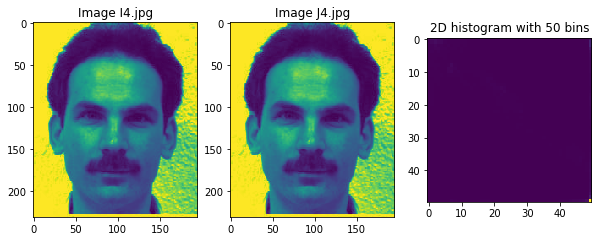

In [26]:
ssd = SSD('I4.jpg','J4.jpg')
corr_coeff = Corr('I4.jpg','J4.jpg')
mi = MI('I4.jpg','J4.jpg')

print(f"The ssd between these two images is {ssd}")
print(f"The Correation between these two images is {corr_coeff}")
print(f"The mutual Information between these images is {mi}")

The ssd between these two images is 78237
The Correation between these two images is 0.6564367191426469
The mutual Information between these images is 0.4754391798359307


<Figure size 432x288 with 0 Axes>

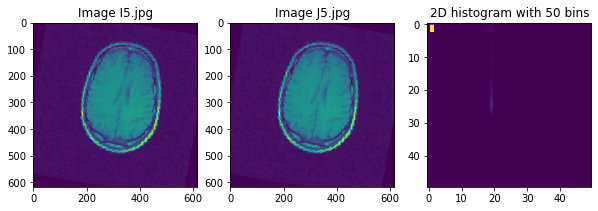

In [27]:
ssd = SSD('I5.jpg','J5.jpg')
corr_coeff = Corr('I5.jpg','J5.jpg')
mi = MI('I5.jpg','J5.jpg')

print(f"The ssd between these two images is {ssd}")
print(f"The Correation between these two images is {corr_coeff}")
print(f"The mutual Information between these images is {mi}")

The ssd between these two images is 79792
The Correation between these two images is 0.7802495447255012
The mutual Information between these images is 0.599165514823006


<Figure size 432x288 with 0 Axes>

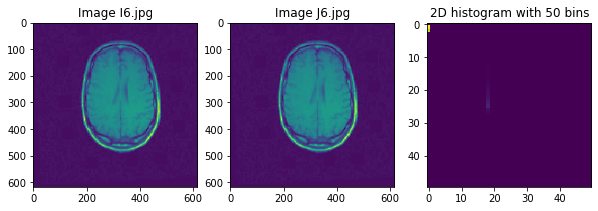

In [28]:
ssd = SSD('I6.jpg','J6.jpg')
corr_coeff = Corr('I6.jpg','J6.jpg')
mi = MI('I6.jpg','J6.jpg')

print(f"The ssd between these two images is {ssd}")
print(f"The Correation between these two images is {corr_coeff}")
print(f"The mutual Information between these images is {mi}")

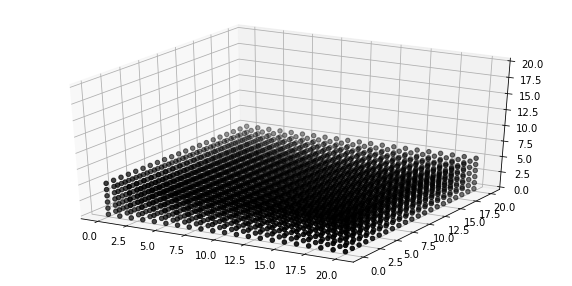

In [35]:
# Part 3 Spatial Transforms
# (a)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

x = [a for a in range(21)]
y = [b for b in range(21)]
z = [c for c in range(6)]
xy = []

for k in z:
    for i in x:
        for j in y:
            point = [i,j,k]
            xy = np.append(xy,point)

B = np.reshape(xy, (-1, 3))
B.shape

x = B[:,0]
y = B[:,1]
z = B[:,2]

fig = plt.figure(figsize = (10,5))
ax = plt.axes(projection='3d')

ax.set_zlim(0, 20)
ax.scatter(x, y, z, c = 'black', marker = 'o')
ax.view_init(30,None)


plt.show()


In [33]:
def rigid_transform(theta,omega,phi,p,q,r):
    rot_x_theta = np.array([[1 ,      0 ,                 0 ,  0 ],
                            [0 ,np.cos(theta), -np.sin(theta), 0 ],
                            [0 ,np.sin(theta) , np.cos(theta), 0 ],
                            [0,      0,              0,        1]])
    
    rot_y_omega = np.array([[np.cos(omega) , 0 , np.sin(omega),  0],
                            [0             ,  1 ,            0 , 0],
                            [-np.sin(omega) , 0 , np.cos(omega), 0],
                            [0              ,0,       0,         1]] )
    
    rot_z_phi   = np.array([[np.cos(phi),   -np.sin(phi),   0,   0],
                            [np.sin(phi) ,   np.cos(phi),   0,   0],
                            [0 ,              0 ,           1,   0],
                            [0 ,              0 ,           0,   1]])
    
    '''trans_pqr = np.array([[1,0,0,p],
                          [0,1,0,q],
                          [0,0,1,r],
                          [0,0,0,1]])'''
    
    tranf_angle = np.matmul(rot_x_theta,rot_y_omega,rot_z_phi)
    
    transf_matrix = np.copy(tranf_angle)
    
    transf_matrix[0,3] = p
    transf_matrix[1,3] = q
    transf_matrix[2,3] = r
    
                           
    
    return rot_x_theta, rot_y_omega, rot_z_phi, tranf_angle,transf_matrix
    

In [34]:
rigid_transform(45,45,45,p=-3,q=3,r=3)

(array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.52532199, -0.85090352,  0.        ],
        [ 0.        ,  0.85090352,  0.52532199,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.52532199,  0.        ,  0.85090352,  0.        ],
        [ 0.        ,  1.        ,  0.        ,  0.        ],
        [-0.85090352,  0.        ,  0.52532199,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.52532199,  0.        ,  0.85090352,  0.        ],
        [ 0.72403681,  0.52532199, -0.44699833,  0.        ],
        [-0.44699833,  0.85090352,  0.27596319,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.52532199,  0.        ,  0.85090352,  0.        ],
        [ 0.72403681,  0.52532199, -0.44699833,  0.        ],
        [-0.44699833,  0.85090352,  0.27596319,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),


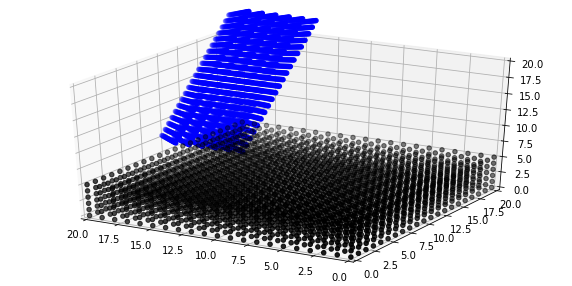

In [103]:
# testing the rigid transformation function on a
a = B.T #Transposing the matrix in a 
ones = np.ones((1,a.shape[1]))

transf_a = np.append(a,ones,axis = 0) #adding row of ones to make it 4 dim

rot_x_theta, rot_y_omega, rot_z_phi, tranf_angle,transf_matrix = rigid_transform(45,45,45,p=20,q=20,r=0)

#the trasnf_matrix will be used for rigid transformation on a

transf_points = np.empty((0,transf_a.shape[0]),float)

for i in range(a.shape[1]):
    points = np.matmul(transf_matrix,transf_a[:,i])    
    
    transf_points = np.append(transf_points,np.array([points]),axis=0)

#the transf_points will have 4 columns with last column as 1, thus removing the 4th column and draw the grid
x1 = transf_points[:,0]
y1 = transf_points[:,1]
z1 = transf_points[:,2]

fig = plt.figure(figsize = (10,5))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 20)
ax.set_ylim(0, 20)
ax.set_xlim(20, 0)
ax.scatter(x, y, z, c = 'black', marker = 'o')

ax.scatter(x1, y1, z1, c = 'blue', marker = 'o')
ax.view_init(30,None)


plt.show()



In [105]:
# (c)
#Affine Transformation with scaling
def affine_transform(s, theta, omega, phi, p, q,r):
    
    rot_x_theta = np.array([[1 ,      0 ,                 0 ,  0 ],
                            [0 ,np.cos(theta), -np.sin(theta), 0 ],
                            [0 ,np.sin(theta) , np.cos(theta), 0 ],
                            [0,      0,              0,        1]])
    
    rot_y_omega = np.array([[np.cos(omega) , 0 , np.sin(omega),  0],
                            [0             ,  1 ,            0 , 0],
                            [-np.sin(omega) , 0 , np.cos(omega), 0],
                            [0              ,0,       0,         1]] )
    
    rot_z_phi   = np.array([[np.cos(phi),   -np.sin(phi),   0,   0],
                            [np.sin(phi) ,   np.cos(phi),   0,   0],
                            [0 ,              0 ,           1,   0],
                            [0 ,              0 ,           0,   1]])
    
    scaled_matrix = np.array([[s,0,0,0],
                              [0,s,0,0],
                              [0,0,s,0],
                              [0,0,0,1]])
    
    
    tranf_angle = np.matmul(rot_x_theta,rot_y_omega,rot_z_phi)
    
    scaled_transf = np.matmul(tranf_angle,scaled_matrix)
    
    transf_matrix = np.copy(scaled_transf)
    
    transf_matrix[0,3] = p
    transf_matrix[1,3] = q
    transf_matrix[2,3] = r
    
    return rot_x_theta, rot_y_omega, rot_z_phi, tranf_angle,transf_matrix
    

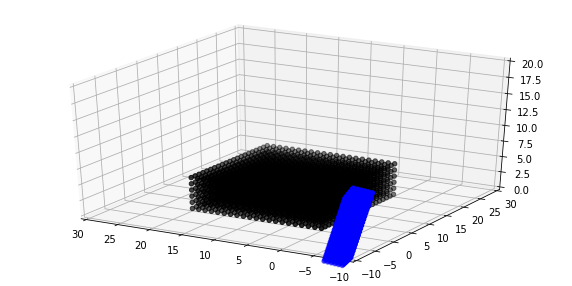

In [155]:
# testing the affine transformation function on a
a = B.T #Transposing the matrix in a 
ones = np.ones((1,a.shape[1]))

transf_a = np.append(a,ones,axis = 0) #adding row of ones to make it 4 dim

rot_x_theta, rot_y_omega, rot_z_phi, tranf_angle,transf_matrix = affine_transform(0.5,45,45,90,p=-10,q=-10,r=0)

#the trasnf_matrix will be used for rigid transformation on a

transf_points = np.empty((0,transf_a.shape[0]),float)

for i in range(a.shape[1]):
    points = np.matmul(transf_matrix,transf_a[:,i])    
    
    transf_points = np.append(transf_points,np.array([points]),axis=0)

#the transf_points will have 4 columns with last column as 1, thus removing the 4th column and draw the grid
x1 = transf_points[:,0]
y1 = transf_points[:,1]
z1 = transf_points[:,2]

fig = plt.figure(figsize = (10,5))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 20)
ax.set_ylim(-10, 30)
ax.set_xlim(30, -10)
ax.scatter(x, y, z, c = 'black', marker = 'o')

ax.scatter(x1, y1, z1, c = 'blue', marker = 'o')
ax.view_init(30,None)

In [44]:
# Part 4 simple 2d registration

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

def translation(I,p,q):
    img = mpimg.imread(I)
    img_data1 = np.array(img)
    
    if img_data1.ndim == 3:
        img_data = np.array(img[:,:,0])
    else:
        img_data = np.array(img)
        
    x = np.linspace(0,img_data.shape[0],img_data.shape[0])
    y = np.linspace(0,img_data.shape[1], img_data.shape[1])

    f = interp2d(x+p,y+q,img_data,kind='cubic',fill_value=0)
    znew = f(x,y)    
    
    return img,znew
    

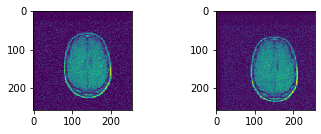

In [55]:
img,znew = translation("BrainMRI_2.jpg",10,10)

plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(znew)

In [8]:
img1 = mpimg.imread("BrainMRI_1.jpg")
img2 = mpimg.imread("BrainMRI_2.jpg")

source_array = np.array(img1)
target_array = np.array(img2)

sum_sqd2 = 100000
sum_sqd1 = 0

ssd_iter = np.empty((0,2))
p = np.arange(-200,200,0.5)
q = np.arange(-200,200,0.5)
i = np.arange(0,img1.shape[0])   

while sum_sqd2 == sum_sqd1 :    
    
    sum_sqd1 = sum(sum(target_array - source_array)**2)
    trans_target = translation("BrainMRI_2.jpg",p[i],q[i])
    sum_sqd2 = sum(sum(trans_target - source_array)**2)
    ssd_arr = np.array([[sum_sqd2,i]])
    ssd_iter = np.append(ssd_iter,ssd_arr,axis = 0)
    i += 1
    
        


In [36]:
corr1 = Corr("BrainMRI_1.jpg","BrainMRI_2.jpg")
corr1

0.6998209575711278

In [47]:
ssd = SSD("BrainMRI_1.jpg","BrainMRI_2.jpg")

img1 = mpimg.imread("BrainMRI_1.jpg")
img2 = mpimg.imread("BrainMRI_2.jpg")

source_array = np.array(img1)
target_array = np.array(img2)

print(ssd)
corr1 = Corr("BrainMRI_1.jpg","BrainMRI_2.jpg")
p = 0
q = 0
while np.sqrt(ssd) > 0:
    img, znew = translation("BrainMRI_2.jpg",p,q)
    ssd = sum(sum(source_array - znew)**2)
    print(ssd)
    p = p - 0.05*(np.sqrt(ssd))*p
    q = q - 0.05*(np.sqrt(ssd))*q

print(ssd)
        
        

33221
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.

965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0
965256187.0


KeyboardInterrupt: 

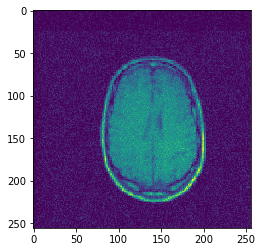

In [170]:

plt.imshow(img2)